In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
dropout_data = pd.read_csv("dropout.csv", delimiter=';')
dropColumn = []
# Now you can proceed to convert the 'Target' column into numeric values
# Assuming that 'dropout' is the label for students at risk, 'enrolled' for students who continue, and 'graduate' for students who graduate
dropout_data['Target'] = dropout_data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
# Feature selection using LASSO (L1 regularization)
X = dropout_data.drop(columns=['Target'])
y = dropout_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (3539, 37)
    Some column names had special characters which were removed...
#### Single

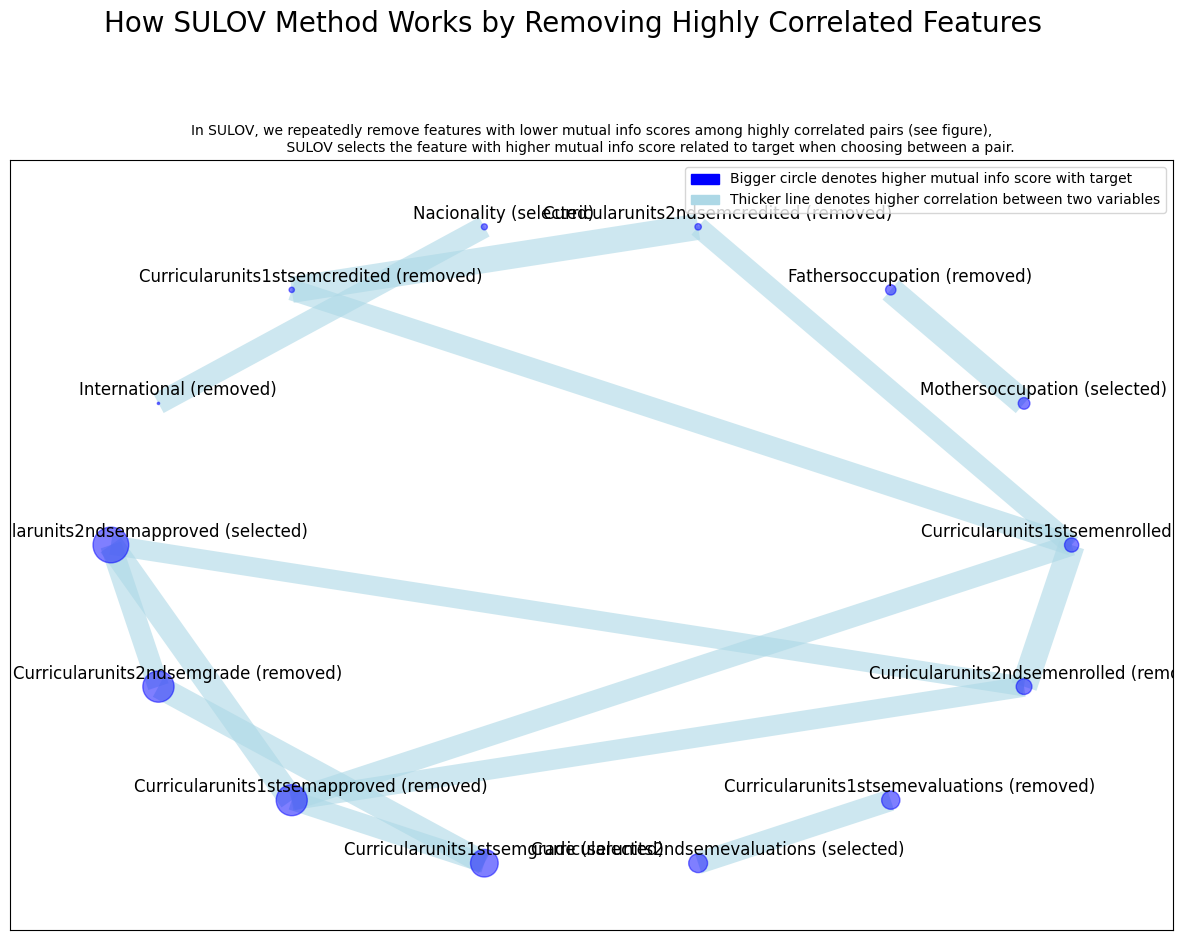

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 28
Final list of selected 28 vars after SULOV = ['Maritalstatus', 'Applicationmode', 'Applicationorder', 'Course', 'Daytimeeveningattendance', 'Previousqualification', 'Previousqualificationgrade', 'Mothersqualification', 'Fathersqualification', 'Admissiongrade', 'Displaced', 'Educationalspecialneeds', 'Debtor', 'Tuitionfeesuptodate', 'Gender', 'Scholarshipholder', 'Ageatenrollment', 'Curricularunits1stsemwithoutevaluations', 'Curricularunits2ndsemwithoutevaluations', 'Unemploymentrate', 'Inflationrate', 'GDP', 'Curricularunits2ndsemapproved', 'Curricularunits1stsemgrade', 'Curricularunits2ndsemevaluations', 'Curricularunits1stsemenrolled', 'Mothersoccupation', 'Nacionality']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U 

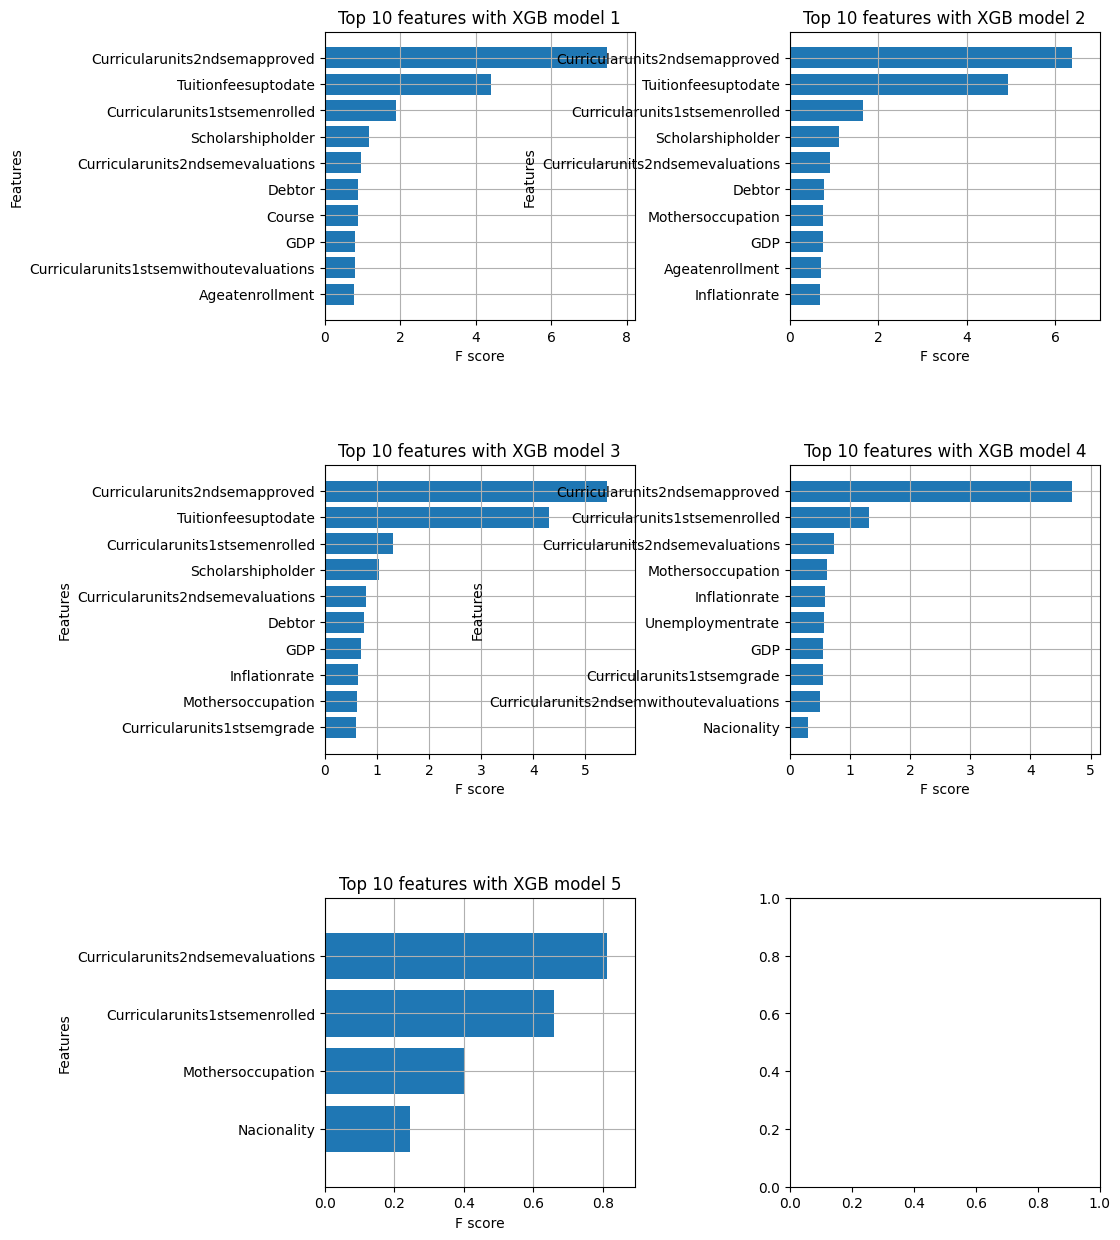

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['Curricularunits2ndsemapproved', 'Admissiongrade', 'Curricularunits1stsemgrade', 'Curricularunits2ndsemevaluations', 'Tuitionfeesuptodate', 'Previousqualificationgrade', 'Course', 'Curricularunits1stsemenrolled', 'Ageatenrollment', 'Mothersoccupation', 'GDP', 'Unemploymentrate', 'Inflationrate', 'Curricularunits2ndsemwithoutevaluations', 'Nacionality']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 15 important features and a train dataframe
    Time taken to create entire pipeline = 2 second(s)
############################################################################################
############       F A 

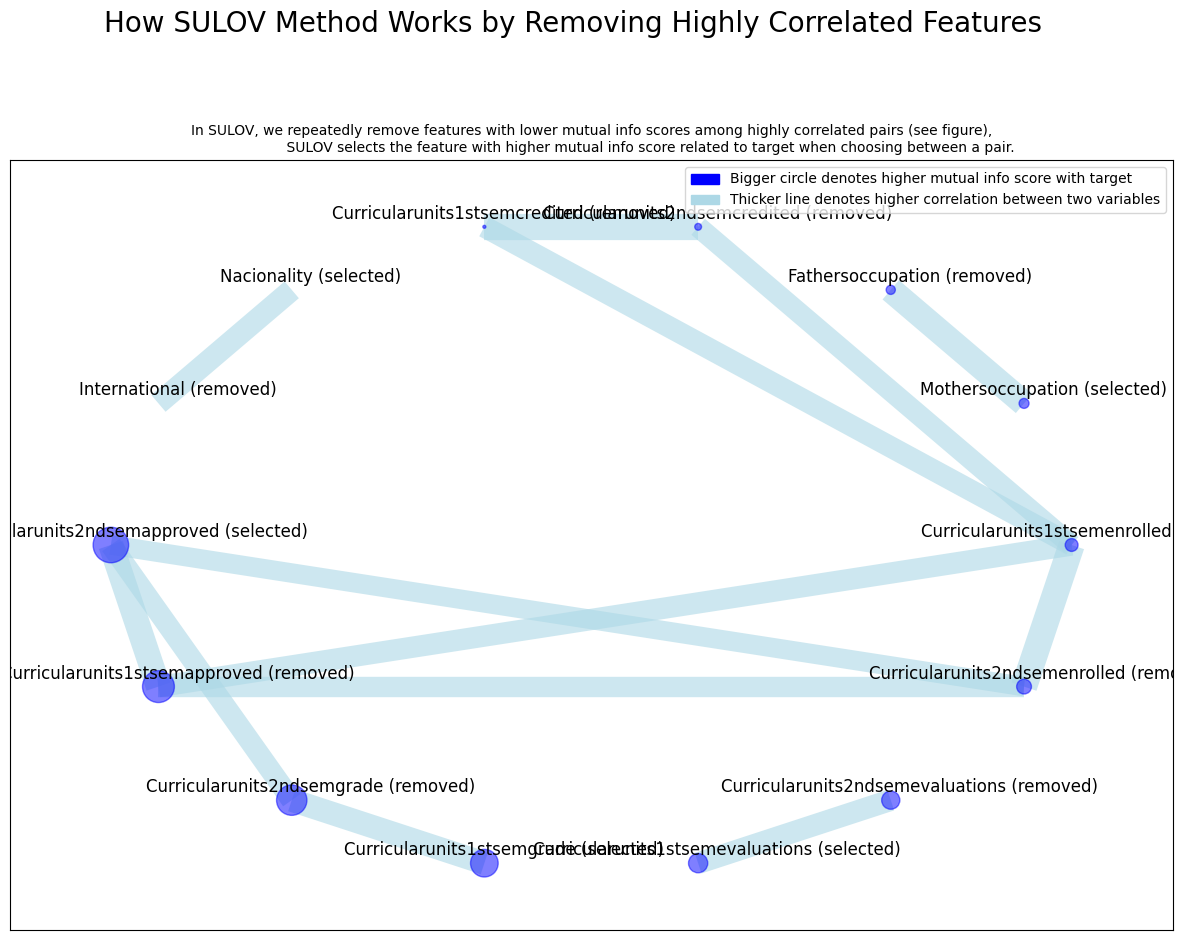

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 28
Final list of selected 28 vars after SULOV = ['Maritalstatus', 'Applicationmode', 'Applicationorder', 'Course', 'Daytimeeveningattendance', 'Previousqualification', 'Previousqualificationgrade', 'Mothersqualification', 'Fathersqualification', 'Admissiongrade', 'Displaced', 'Educationalspecialneeds', 'Debtor', 'Tuitionfeesuptodate', 'Gender', 'Scholarshipholder', 'Ageatenrollment', 'Curricularunits1stsemwithoutevaluations', 'Curricularunits2ndsemwithoutevaluations', 'Unemploymentrate', 'Inflationrate', 'GDP', 'Curricularunits2ndsemapproved', 'Curricularunits1stsemgrade', 'Curricularunits1stsemevaluations', 'Curricularunits1stsemenrolled', 'Mothersoccupation', 'Nacionality']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U 

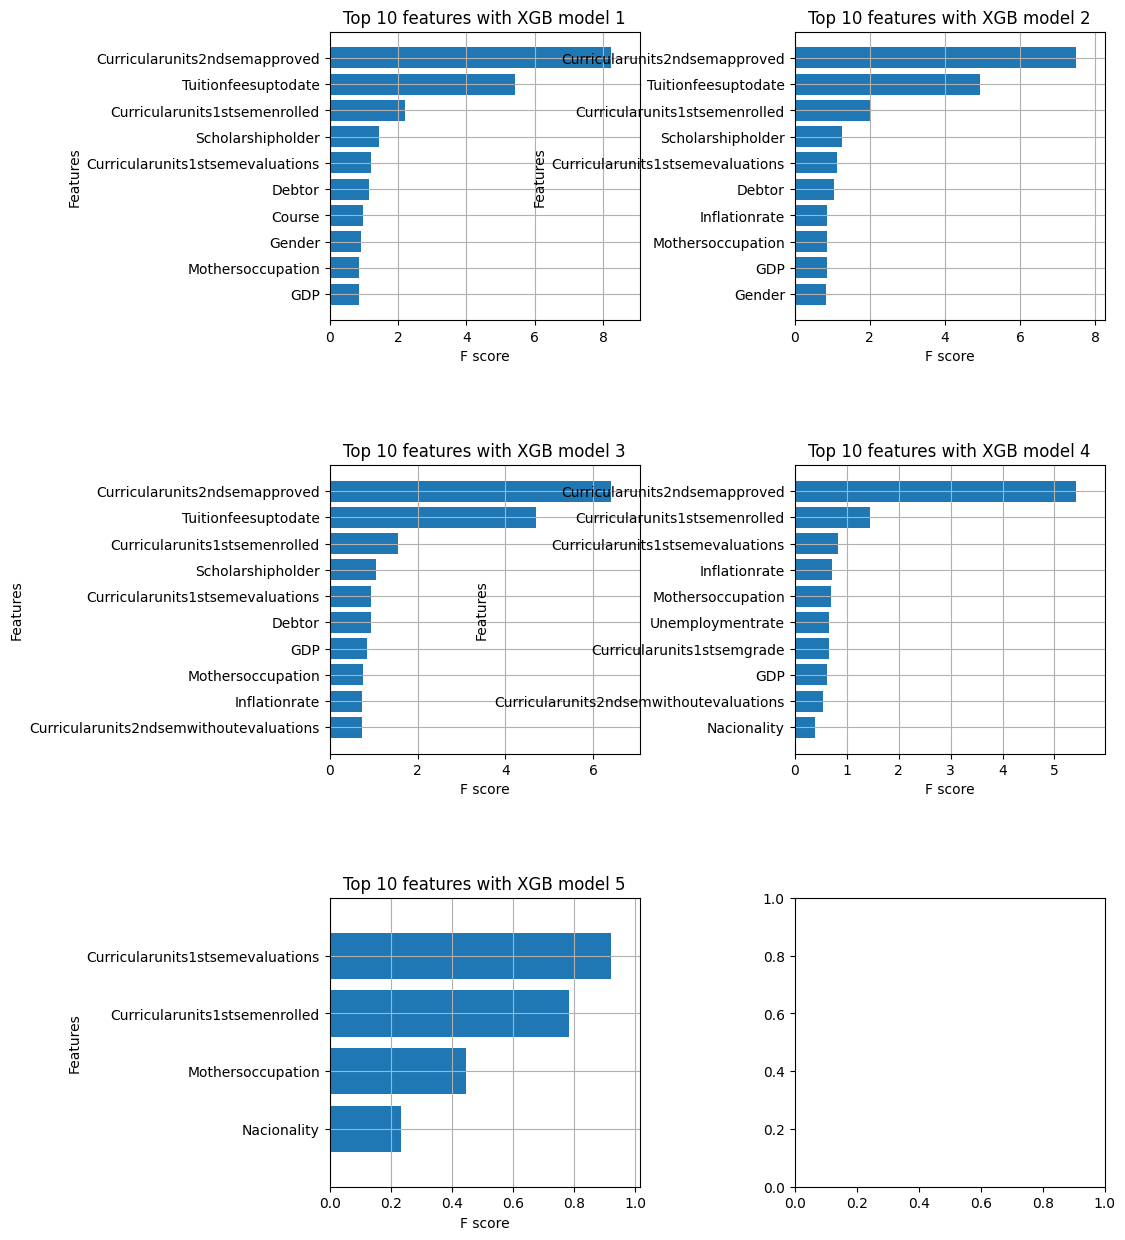

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['Curricularunits2ndsemapproved', 'Admissiongrade', 'Curricularunits1stsemgrade', 'Tuitionfeesuptodate', 'Curricularunits1stsemenrolled', 'Curricularunits1stsemevaluations', 'Course', 'Previousqualificationgrade', 'Mothersoccupation', 'Ageatenrollment', 'GDP', 'Unemploymentrate', 'Inflationrate', 'Curricularunits2ndsemwithoutevaluations', 'Nacionality']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 15 important features and a train dataframe


In [5]:
from featurewiz import FeatureWiz
features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = features.fit_transform(X_train, y_train)
X_test_selected = features.transform(X_test)
import featurewiz as FW
outputs = FW.featurewiz(dataname=dropout_data, target='Target', corr_limit=0.70, verbose=2, sep=',', 
                header=0, test_data='',feature_engg='', category_encoders='',
                dask_xgboost_flag=False, nrows=None)

In [6]:
newdf = outputs[0]
newdf

['Curricular units 2nd sem (approved)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Course',
 'Previous qualification (grade)',
 "Mother's occupation",
 'Age at enrollment',
 'GDP',
 'Unemployment rate',
 'Inflation rate',
 'Curricular units 2nd sem (without evaluations)',
 'Nacionality']

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

In [137]:
# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Convert the 'Target' column into numeric values
label_encoder = LabelEncoder()
dropout_data['Target'] = label_encoder.fit_transform(dropout_data['Target'])

# Split the data into features and the target
X = dropout_data.drop(columns=['Target'])
X = X.drop(columns=['Nacionality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
y = dropout_data['Target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output units for 'dropout', 'enrolled', and 'graduate'

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert target labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=2048, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions back to labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 1.2416 - accuracy: 0.3252
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 1.1085 - accuracy: 0.3614
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0267 - accuracy: 0.4860
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9679 - accuracy: 0.5869
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9249 - accuracy: 0.6380
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8923 - accuracy: 0.6530
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8596 - accuracy: 0.6640
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8204 - accuracy: 0.6773
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8037 - accuracy: 0.6858
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 0.7742 - accuracy: 0.6886
Epoch 11/100
2/2 [=========

In [8]:
# Load the dataset with the correct delimiter (semicolon)
dropout_data = pd.read_csv("dropout.csv", delimiter=';')

# Convert the 'Target' column into numeric values
label_encoder = LabelEncoder()
dropout_data['Target'] = label_encoder.fit_transform(dropout_data['Target'])

# Split the data into features and the target
X = dropout_data.drop(columns=['Target'])
X = X.drop(columns=['Nacionality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
# X = X[outputs[0]]
y = dropout_data['Target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [130]:
from xgboost import XGBClassifier
xbc = XGBClassifier(tree_method = 'gpu_hist')
xbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [131]:
import tensorflow as tf
y_pred = xbc.predict(X_test)
# decoded = tf.argmax(y_pred, axis=1)
# print("accuracy:",round(accuracy_score(y_test,y_pred)*100,2),"%")
round(accuracy_score(y_test,y_pred)*100,2)

79.55

In [77]:
len(y_train[y_train==0])/len(y_train),len(y_train[y_train==1])/len(y_train),len(y_train[y_train==2])/len(y_train)

(0.3221248940378638, 0.18112461147216727, 0.49675049448996894)

In [24]:
import pandas as pd
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [25]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
lr = LogisticRegression(random_state=40)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='gpu_hist')
svc = svm.SVC(kernel='linear',probability=True)

In [37]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc.fit(X_train, y_train)
svc.fit(X_train, y_train)

c:\Users\LALA\PycharmProjects\ECS 171 project\ECS171Group32\.venv\lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


SVC(kernel='linear', probability=True)

In [38]:
y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = rfc.predict(X_test)
print("RandomForest Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = lr.predict(X_test)
print("LogisticRegression Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = knn.predict(X_test)
print("KNeighbors Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = abc.predict(X_test)
print("AdaBoost Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = xbc.predict(X_test)
print("XGBoost Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

y_pred = svc.predict(X_test)
print("SVM Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Decision Tree Accuracy : 67.91 %
RandomForest Accuracy : 80.79 %
LogisticRegression Accuracy : 77.51 %
KNeighbors Accuracy : 71.07 %
AdaBoost Accuracy : 77.4 %
XGBoost Accuracy : 79.55 %
SVM Accuracy : 77.29 %


In [52]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('xbc',xbc)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Voting Classifier Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Voting Classifier Accuracy : 81.02 %


In [53]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', svc), ('abc',abc), ('xbc',xbc)], voting='soft')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Voting Classifier Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Voting Classifier Accuracy : 81.58 %
